In [162]:
import matplotlib.pyplot as plt
import numpy as np

In [163]:
import torch
from torchvision import models, transforms
from PIL import Image

In [164]:
# 1. Cihazı ayarla
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [165]:
model = models.segmentation.deeplabv3_resnet101(pretrained=True)
model.eval()

/home/bilal/miniconda3/envs/pt/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/bilal/miniconda3/envs/pt/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [166]:
# 2. Modeli al ve GPU'ya taşı
model = models.segmentation.deeplabv3_resnet101(pretrained=True)
model = model.to(device)
model.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [167]:
# 3. Görüntüyü hazırla
img = Image.open("../resimler/kedi-köpek.jpg").convert("RGB").resize((512, 512))
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])
input_tensor = transform(img).unsqueeze(0).to(device)

In [ ]:
with torch.no_grad():
    output = model(input_tensor)
    
output_mask = output['out'][0]
predicted_mask = output_mask.argmax(0)

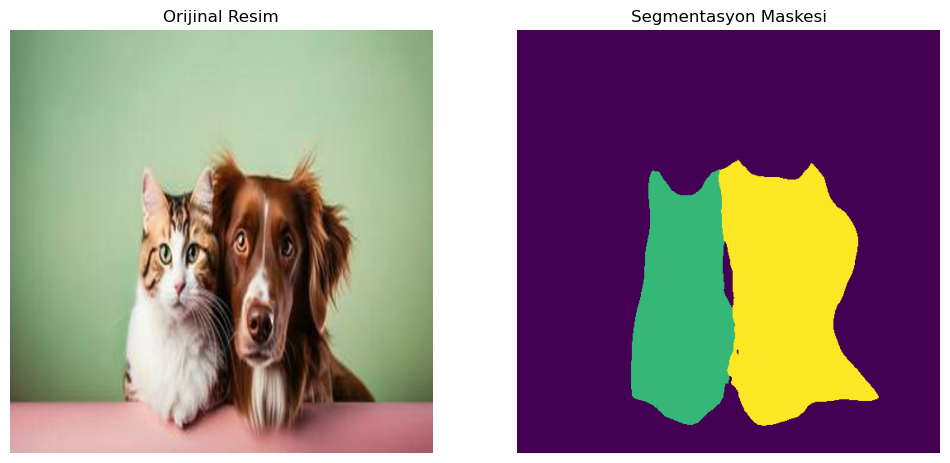

In [179]:
# 6. Görüntüle
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 1. Subplot: Orijinal Resim
axes[0].imshow(np.array(img))
axes[0].set_title("Orijinal Resim")
axes[0].axis('off')

# 2. Subplot: Segmentasyon Maskesi
axes[1].imshow(predicted_mask.cpu().numpy())
axes[1].set_title("Segmentasyon Maskesi")
axes[1].axis('off')

plt.show()

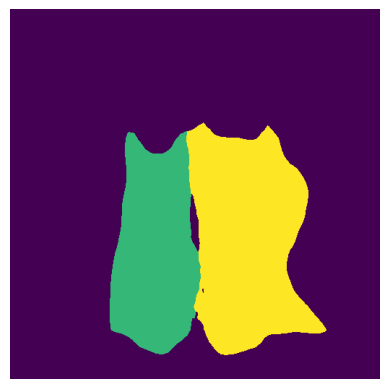

In [178]:
# 6. Görüntüle
plt.imshow(predicted_mask.cpu().numpy())
plt.axis('off')
plt.show()

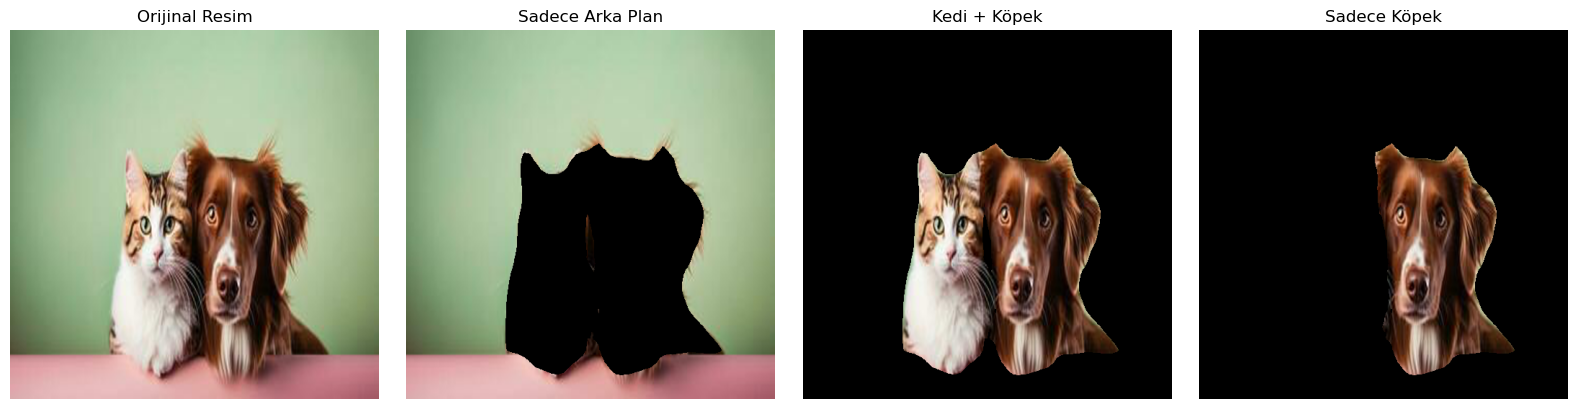

In [184]:
import matplotlib.pyplot as plt
import numpy as np

# 6. Görüntüle
fig, axes = plt.subplots(1, 4, figsize=(16, 4))  # 1x4 subplot oluşturuyoruz: 1 satır ve 4 sütun

# 1. Subplot: Orijinal Resim
axes[0].imshow(np.array(img))
axes[0].set_title("Orijinal Resim")
axes[0].axis('off')

# 2. Subplot: Sadece Arka Plan
background_mask = (predicted_mask.cpu().numpy() == 0)  # Arka plan (sınıf 0)
background_image = np.array(img) * np.expand_dims(background_mask, axis=-1)
axes[1].imshow(background_image)
axes[1].set_title("Sadece Arka Plan")
axes[1].axis('off')

# 3. Subplot: Kedi + Köpek
cat_mask = (predicted_mask.cpu().numpy() == 8)  # Kedi (sınıf 8)
dog_mask = (predicted_mask.cpu().numpy() == 12)  # Köpek (sınıf 12)

# Kediyi ve köpeği birleştir
combined_mask = np.logical_or(cat_mask, dog_mask)

# Kedi ve köpek maskelerini orijinal resimle birleştir
image_without_background = np.array(img) * np.expand_dims(combined_mask, axis=-1)
axes[2].imshow(image_without_background)
axes[2].set_title("Kedi + Köpek")
axes[2].axis('off')

# 4. Subplot: Sadece Köpek
dog_image = np.array(img) * np.expand_dims(dog_mask, axis=-1)
axes[3].imshow(dog_image)
axes[3].set_title("Sadece Köpek")
axes[3].axis('off')

plt.tight_layout()
plt.show()


In [185]:
unique_classes = torch.unique(predicted_mask)
print(unique_classes)

tensor([ 0,  8, 12], device='cuda:0')


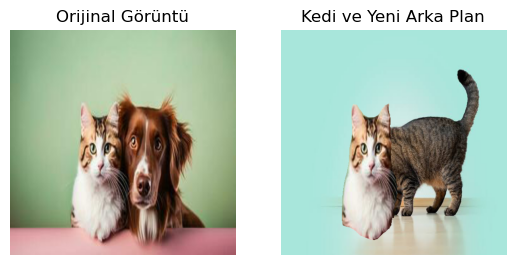

In [ ]:
# 7. Yeni arka plan resmini yükle ve boyutlandır
background_img = Image.open("../resimler/kedi.jpeg").resize((512, 512))

# 8. Arka planı ve kediyi birleştirme
# Orijinal resmin her pikseliyle kedi maskesini kullanarak, arka planı yeni resimle değiştireceğiz
background_array = np.array(background_img)
cat_image = np.array(img) * np.expand_dims(kedi_maske.cpu().numpy(), axis=-1)  # Kediyi orijinal resimden al

# Yeni arka planı maskenin False olduğu yerlerde kullan
background_image_with_cat = background_array * (1 - np.expand_dims(kedi_maske.cpu().numpy(), axis=-1))  # Arka planı ekle

# Kedi ve yeni arka planı birleştir
final_image = background_image_with_cat + cat_image

# 9. Sonuçları görselleştir
plt.subplot(1, 2, 1)
plt.imshow(np.array(img))
plt.title("Orijinal Görüntü")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(final_image)
plt.title("Kedi ve Yeni Arka Plan")
plt.axis('off')

plt.show()

In [176]:
from torchvision.models.segmentation import deeplabv3_resnet101
model = deeplabv3_resnet101(pretrained=True)
print(model.aux_classifier[-1].out_channels)  # PA

21
